In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

# Set the style for visualizations
plt.style.use('ggplot')
sns.set_palette("Set2")

/Users/waileongleong/python/loan-analysis


In [3]:
from util import *

# Consumer Loan Analysis - Risk Assessment Exercise


In [4]:
df = load_and_preprocess_data("./data/loans_fs.csv",filter_outlier=True)
df.describe().style

Loading and preprocessing data...
Dataset shape: (887379, 14)

Column names and data types:
Schema({'': Int64, 'loan_amnt': Float64, 'term': String, 'int_rate': Float64, 'dti': Float64, 'grade': String, 'annual_inc': Float64, 'home_ownership': String, 'pymnt_plan': String, 'purpose': String, 'emp_title': String, 'issue_d': String, 'loan_status': String, 'emp_length': String})
Outlier boundaries for dti:
  Lower bound: -24.260000000000005
  Upper bound: 60.09
  Number of outliers: 1143 (0.13%)
Dataset shape after filtering: (867661, 17)


statistic,,loan_amnt,int_rate,dti,grade,annual_inc,home_ownership,pymnt_plan,purpose,emp_title,loan_status,emp_length,issue_date,term_months,emp_length_years,is_default,dti_capped
count,867661.0,867661.0,867661.0,867661.0,867661,867661.0,867661,867661,867661,817337,867661,867661,867661,867661.0,823833.0,867661.0,867661.0
null_count,0.0,0.0,0.0,0.0,0,0.0,0,0,0,50324,0,0,0,0.0,43828.0,0.0,0.0
mean,443682.68627493916,15042.465749872357,13.352298824079911,18.131274541554824,None,78028.33396933826,None,None,None,None,None,None,2014-07-10 07:17:36.444394,43.19941082980565,6.010131907801703,0.05229576989169733,18.131274541554824
std,256153.7234820799,11507.105309482147,5.136157888878678,8.303376818898412,None,106639.00118952301,None,None,None,None,None,None,None,10.997930851843858,3.6657440666327705,0.22262295358597473,8.303376818898412
min,0.0,500.0,1.0,0.0,A,1896.0,ANY,n,car,Adv Mtr Proj Fld Rep,Charged Off,1 year,2007-06-01 00:00:00,36.0,0.0,0.0,0.0
25%,221834.0,8000.0,9.99,11.91,None,45000.0,None,None,None,None,None,None,2013-12-01 00:00:00,36.0,3.0,0.0,11.91
50%,443737.0,13000.0,12.99,17.66,None,65000.0,None,None,None,None,None,None,2014-11-01 00:00:00,36.0,6.0,0.0,17.66
75%,665474.0,20000.0,16.49,23.95,None,90000.0,None,None,None,None,None,None,2015-07-01 00:00:00,60.0,10.0,0.0,23.95
max,887378.0,250000.0,28.99,60.08,G,15000000.0,RENT,y,wedding,​License Compliance Investigator,Late (31-120 days),n/a,2015-12-01 00:00:00,60.0,10.0,1.0,60.08


In [5]:
import matplotlib.ticker as mtick

# Set plotting style
plt.style.use('ggplot')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

def create_dataset_overview(df: pl.DataFrame):
    """Generate dataset overview statistics and visualizations"""
    
    # 1. Portfolio Summary Statistics
    print("Dataset Dimensions:", df.shape)
    
    # Time period analysis
    if "issue_d" in df.columns:
        min_date = df["issue_date"].min()
        max_date = df["issue_date"].max()
        print(f"Time Period: {min_date} to {max_date}")
    
    # 2. Loan Amount Distribution
    loan_stats = df.select([
        pl.col("loan_amnt").mean().alias("mean"),
        pl.col("loan_amnt").median().alias("median"),
        pl.col("loan_amnt").min().alias("min"),
        pl.col("loan_amnt").max().alias("max"),
        pl.col("loan_amnt").std().alias("std_dev")
    ])
    
    print("\nLoan Amount Statistics:")
    print(loan_stats)
    
    # 3. Loan Term Distribution
    term_counts = df.group_by("term_months").agg(
        pl.len().alias("count"),
        (pl.len() / len(df) * 100).alias("percentage")
    ).sort("count", descending=True)
    
    print("\nLoan Term Distribution:")
    print(term_counts)
    
    # 4. Interest Rate Statistics
    int_rate_stats = df.select([
        pl.col("int_rate").mean().alias("mean"),
        pl.col("int_rate").median().alias("median"),
        pl.col("int_rate").min().alias("min"),
        pl.col("int_rate").max().alias("max"),
        pl.col("int_rate").std().alias("std_dev")
    ])
    
    print("\nInterest Rate Statistics:")
    print(int_rate_stats)
    
    status_counts = df.group_by("loan_status").agg(
        pl.len().alias("count"),
        (pl.len() / len(df) * 100).alias("percentage")
    ).sort("count", descending=True)
    
    print("\nLoan Status Distribution:")
    print(status_counts)
    
    # 6. Employment Length Distribution (if available)
    if "emp_length" in df.columns:
        emp_counts = df.group_by("emp_length").agg(
            pl.len().alias("count"),
            (pl.len() / len(df) * 100).alias("percentage")
        ).sort("count", descending=True)
        
        print("\nEmployment Length Distribution:")
        print(emp_counts)
    
    # Visualizations for the slide
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Loan Amount Distribution
    sns.histplot(df["loan_amnt"], bins=30, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Loan Amount Distribution')
    axes[0, 0].set_xlabel('Loan Amount ($)')
    axes[0, 0].set_ylabel('Frequency')
    
    # Format x-axis with $ signs
    formatter = mtick.StrMethodFormatter('${x:,.0f}')
    axes[0, 0].xaxis.set_major_formatter(formatter)
    
    # 2. Interest Rate Distribution
    sns.histplot(df["int_rate"], bins=30, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Interest Rate Distribution')
    axes[0, 1].set_xlabel('Interest Rate (%)')
    axes[0, 1].set_ylabel('Frequency')
    
    # Format x-axis with % signs
    formatter = mtick.StrMethodFormatter('{x:.1f}%')
    axes[0, 1].xaxis.set_major_formatter(formatter)
    
    # 3. Status Group Distribution
    status_data = status_counts.sort("count")
    sns.barplot(
        x=status_data["count"].to_list(),
        y=status_data["loan_status"].to_list(),
        ax=axes[1, 0]
    )
    axes[1, 0].set_title('Loan Status Distribution')
    axes[1, 0].set_xlabel('Count')
    axes[1, 0].set_ylabel('Loan Status')
    
    # Add percentage labels
    for i, p in enumerate(axes[1, 0].patches):
        percentage = f"{status_data['percentage'][i]:.1f}%"
        axes[1, 0].annotate(percentage, 
                    (p.get_width(), p.get_y() + p.get_height()/2),
                    va = 'center', ha = 'left', xytext = (5, 0), 
                    textcoords = 'offset points')
    
    # 4. Term Distribution
    if term_counts.shape[0] > 0:
        term_data = term_counts.sort("count", descending=True)
        sns.barplot(
            x=term_data["term_months"].to_list(),
            y=term_data["percentage"].to_list(),
            ax=axes[1, 1]
        )
        axes[1, 1].set_title('Loan Term Distribution')
        axes[1, 1].set_xlabel('Term')
        axes[1, 1].set_ylabel('Percentage (%)')
        
        # Add percentage labels
        for i, p in enumerate(axes[1, 1].patches):
            percentage = f"{term_data['percentage'][i]:.1f}%"
            axes[1, 1].annotate(percentage, 
                        (p.get_x() + p.get_width()/2, p.get_height()), 
                        ha = 'center', va = 'bottom', xytext = (0, 5),
                        textcoords = 'offset points')
    
    plt.tight_layout()
    # plt.savefig('dataset_overview.png', dpi=300, bbox_inches='tight')
    # plt.close()
    
    # Create summary table for the slide
    summary_stats = {
        "Metric": ["Total Loans", "Time Period", "Avg Loan Amount", "Avg Interest Rate", "Most Common Term"],
        "Value": [
            f"{df.shape[0]:,}",
            f"{min_date.strftime('%b %Y')} - {max_date.strftime('%b %Y')}" if 'min_date' in locals() else "N/A",
            f"${loan_stats[0, 'mean']:,.2f}",
            f"{int_rate_stats[0, 'mean']:.2f}%",
            f"{term_counts[0, 'term_months']} ({term_counts[0, 'percentage']:.1f}%)" if term_counts.shape[0] > 0 else "N/A"
        ]
    }
    
    summary_df = pl.DataFrame(summary_stats)
    print("\nDataset Summary:")
    print(summary_df)
    
    # Return the dataframe with the status_group column added
    return df, summary_df

Dataset Dimensions: (867661, 17)

Loan Amount Statistics:
shape: (1, 5)
┌─────────────┬─────────┬───────┬──────────┬──────────────┐
│ mean        ┆ median  ┆ min   ┆ max      ┆ std_dev      │
│ ---         ┆ ---     ┆ ---   ┆ ---      ┆ ---          │
│ f64         ┆ f64     ┆ f64   ┆ f64      ┆ f64          │
╞═════════════╪═════════╪═══════╪══════════╪══════════════╡
│ 15042.46575 ┆ 13000.0 ┆ 500.0 ┆ 250000.0 ┆ 11507.105309 │
└─────────────┴─────────┴───────┴──────────┴──────────────┘

Loan Term Distribution:
shape: (2, 3)
┌─────────────┬────────┬────────────┐
│ term_months ┆ count  ┆ percentage │
│ ---         ┆ ---    ┆ ---        │
│ i32         ┆ u32    ┆ f64        │
╞═════════════╪════════╪════════════╡
│ 36          ┆ 607384 ┆ 70.002455  │
│ 60          ┆ 260277 ┆ 29.997545  │
└─────────────┴────────┴────────────┘

Interest Rate Statistics:
shape: (1, 5)
┌───────────┬────────┬─────┬───────┬──────────┐
│ mean      ┆ median ┆ min ┆ max   ┆ std_dev  │
│ ---       ┆ ---    ┆ --- ┆

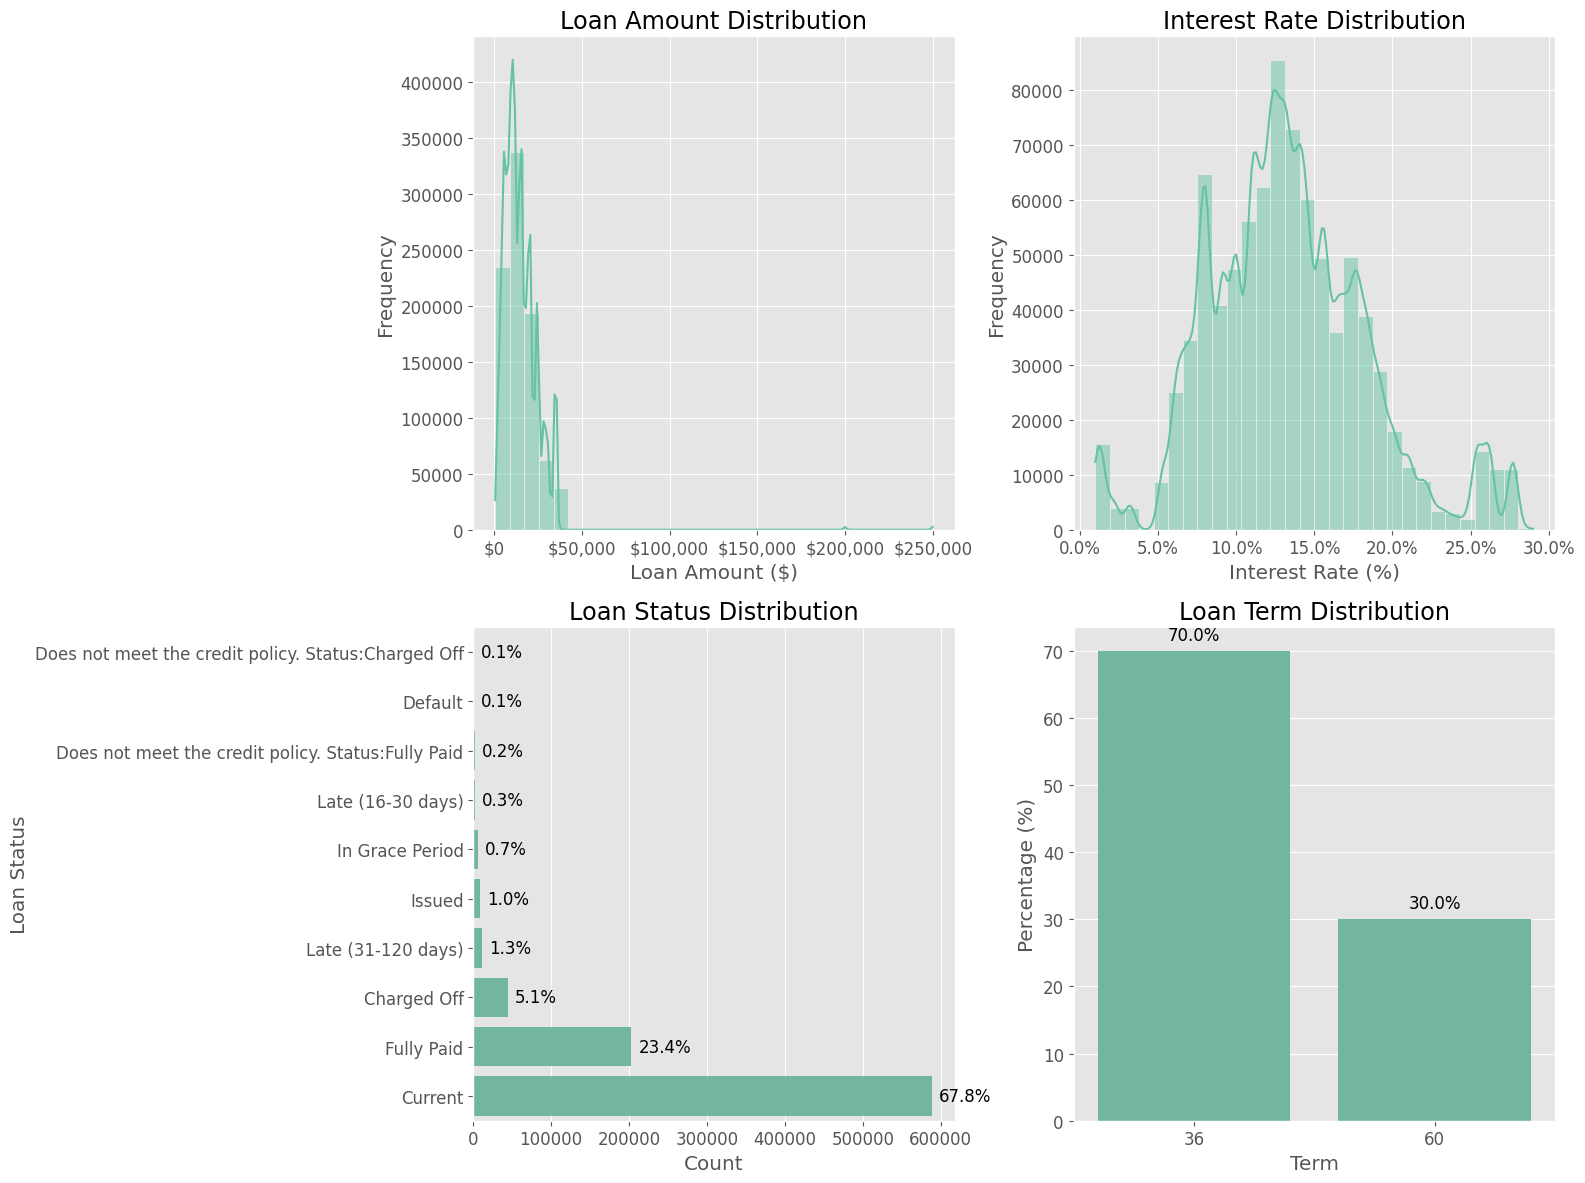

In [6]:
_, summary_df = create_dataset_overview(df)

# Interest Rate - Is Default Test

In [7]:
from scipy import stats

def perform_eda(df: pl.DataFrame):
    
    # Interest rate by loan status
    int_rate_by_status = df.group_by("is_default").agg([
        pl.col("int_rate").mean().alias("avg_int_rate"),
        pl.col("int_rate").std().alias("std_int_rate"),
        pl.col("int_rate").min().alias("min_int_rate"),
        pl.col("int_rate").max().alias("max_int_rate")
    ])
    
    print("\nInterest Rate by Loan Status:")
    print(int_rate_by_status)
    
    # Plot interest rate distribution by loan status
    plt.figure(figsize=(10, 6))
    for status in df["is_default"].unique():
        sns.kdeplot(
            df.filter(pl.col("is_default") == status)["int_rate"], 
            label=status
        )
    plt.title("Interest Rate Distribution by Loan Status")
    plt.xlabel("Interest Rate (%)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.savefig("interest_rate_by_status.png", dpi=300)



    # Extract the two groups
    default_rates = df.filter(pl.col("is_default") == 1)["int_rate"].to_numpy()
    non_default_rates = df.filter(pl.col("is_default") == 0)["int_rate"].to_numpy()

    # Perform Welch's t-test (not assuming equal variances)
    t_stat, p_value = stats.ttest_ind(default_rates, non_default_rates, equal_var=False)

    print(f"Welch's t-test results:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.8f}")
    print(f"Statistically significant difference? {'Yes' if p_value < 0.05 else 'No'}")
    
    
    return int_rate_by_status


Interest Rate by Loan Status:
shape: (2, 5)
┌────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ is_default ┆ avg_int_rate ┆ std_int_rate ┆ min_int_rate ┆ max_int_rate │
│ ---        ┆ ---          ┆ ---          ┆ ---          ┆ ---          │
│ i32        ┆ f64          ┆ f64          ┆ f64          ┆ f64          │
╞════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ 0          ┆ 13.247646    ┆ 5.107033     ┆ 1.0          ┆ 28.99        │
│ 1          ┆ 15.248815    ┆ 5.290736     ┆ 1.0          ┆ 28.99        │
└────────────┴──────────────┴──────────────┴──────────────┴──────────────┘
Welch's t-test results:
t-statistic: 78.5758
p-value: 0.00000000
Statistically significant difference? Yes


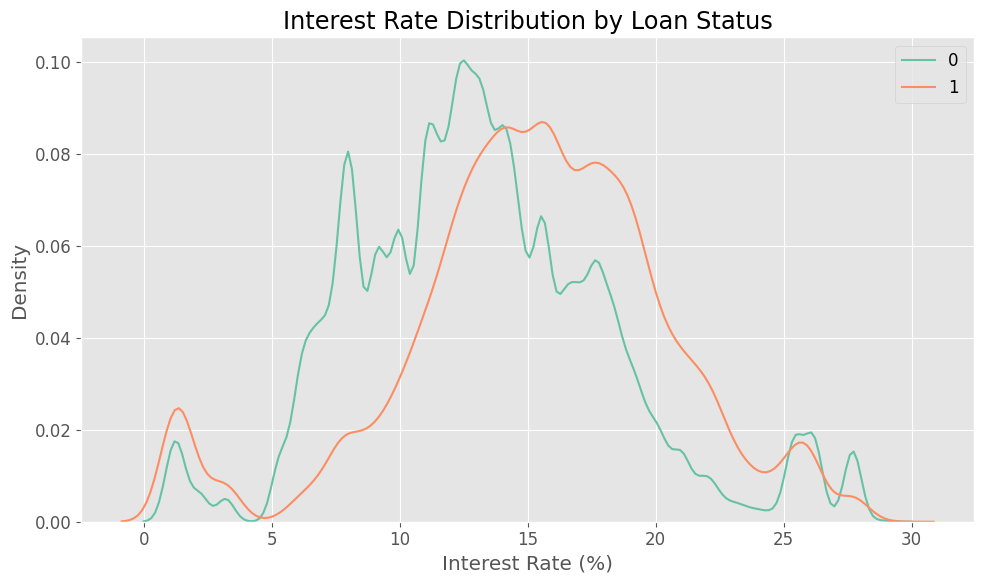

In [8]:

int_rate_by_status = perform_eda(df)


Interest Rate by Loan Status:
shape: (2, 5)
┌────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ is_default ┆ avg_int_rate ┆ std_int_rate ┆ min_int_rate ┆ max_int_rate │
│ ---        ┆ ---          ┆ ---          ┆ ---          ┆ ---          │
│ i32        ┆ f64          ┆ f64          ┆ f64          ┆ f64          │
╞════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ 0          ┆ 15.085999    ┆ 5.173192     ┆ 1.0          ┆ 28.99        │
│ 1          ┆ 16.468832    ┆ 6.255423     ┆ 1.0          ┆ 28.99        │
└────────────┴──────────────┴──────────────┴──────────────┴──────────────┘
Welch's t-test results:
t-statistic: 27.5812
p-value: 0.00000000
Statistically significant difference? Yes


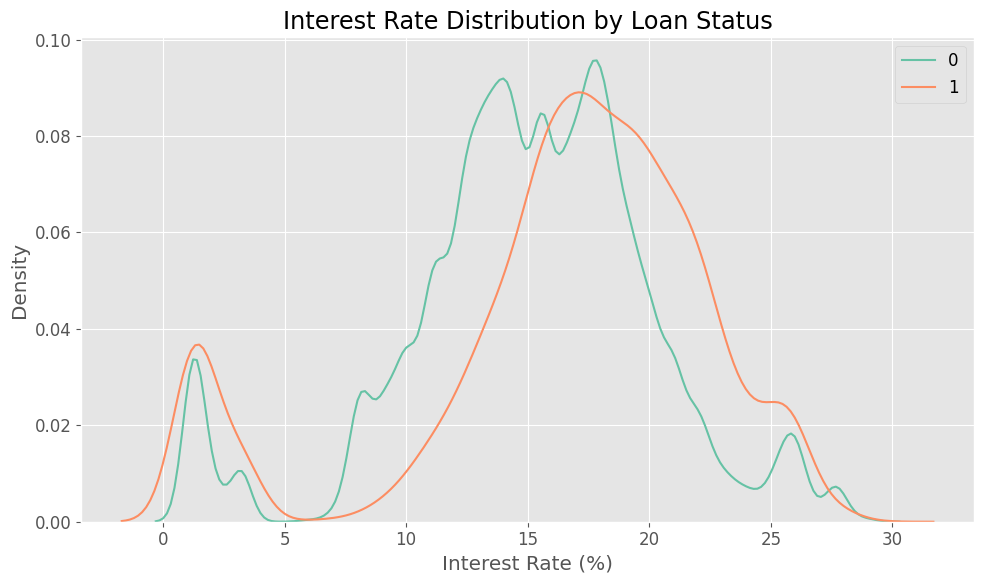

In [9]:
int_rate_by_status = perform_eda(df.filter(pl.col("term_months") == 60))

# DTI

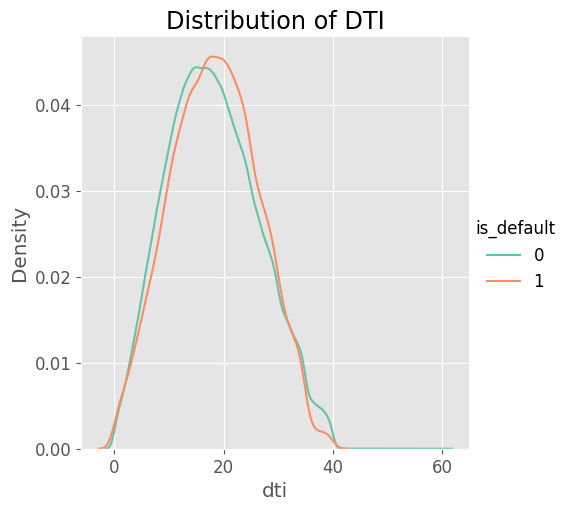

In [10]:
sns.FacetGrid(df.to_pandas(), hue="is_default", height=5).map(sns.kdeplot, "dti").add_legend()
plt.title('Distribution of DTI')
plt.xlabel('dti')
plt.ylabel('Density')
plt.show()

# Chi Square for Categorical

In [19]:
from pathlib import Path
# Visualization functions
def plot_pvalues(results_df):
    """Plot p-values from chi-square test"""
    Path('feature_selection_plots').mkdir(exist_ok=True)
    
    results_pd = results_df.to_pandas()
    plt.figure(figsize=(12, 8))
    plt.barh(results_pd['column'], -np.log10(results_pd['p_value']))
    plt.axvline(x=-np.log10(0.05), color='red', linestyle='--', label='p=0.05')
    plt.xlabel('-log10(p-value)')
    plt.title('Chi-square Test Results (-log10 p-value)')
    plt.legend()
    plt.tight_layout()
    # plt.savefig('feature_selection_plots/chi_square_pvalues.png')
    # plt.close()

# Function to perform chi-square test on all categorical variables
def chi_square_test(df, target_col='default',excluded_cols=[]):
    """
    Perform chi-square test on all categorical variables against a binary target
    
    Returns:
    DataFrame with chi-square test results sorted by p-value
    """
    print("\n=== CHI-SQUARE TEST FOR CATEGORICAL VARIABLES ===")
    
    # Identify categorical columns
    categorical_columns = [col for col, dtype in df.schema.items() 
                           if (dtype == pl.Utf8 or df[col].n_unique() < 20) and col not in excluded_cols]
    
    # Remove the target column if it's in the list
    if target_col in categorical_columns:
        categorical_columns.remove(target_col)
    
    # Prepare results
    results = []
    
    # Perform chi-square test for each categorical column
    for column in categorical_columns:
        # Create contingency table
        contingency = df.group_by([column, target_col]).agg(pl.count().alias('count'))
        
        # Convert to pivot format
        pivot = contingency.pivot(
            values='count',
            index=column,
            columns=target_col
        ).fill_null(0)
        
        # Check if we have both target values (0 and 1)
        if '0' in pivot.columns and '1' in pivot.columns:
            # Convert to numpy array for chi2 test
            # We need to select just the data columns (not the index column)
            contingency_array = pivot.select(['0', '1']).to_numpy()
            
            # Skip if there's only one category (chi-square won't work)
            if contingency_array.shape[0] <= 1:
                continue
                
            # Perform chi-square test
            chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_array)
            
            # Add to results
            results.append({
                'column': column,
                'chi2_stat': chi2_stat,
                'p_value': p_value,
                'dof': dof,
                'significant': p_value < 0.05
            })
    
    # Convert results to DataFrame
    results_df = pl.DataFrame(results).sort('p_value')
    print(results_df)
    
    # Plot the p-values
    plot_pvalues(results_df)
    
    return results_df



=== CHI-SQUARE TEST FOR CATEGORICAL VARIABLES ===
shape: (8, 5)
┌──────────────────┬───────────────┬─────────────┬────────┬─────────────┐
│ column           ┆ chi2_stat     ┆ p_value     ┆ dof    ┆ significant │
│ ---              ┆ ---           ┆ ---         ┆ ---    ┆ ---         │
│ str              ┆ f64           ┆ f64         ┆ i64    ┆ i64         │
╞══════════════════╪═══════════════╪═════════════╪════════╪═════════════╡
│ grade            ┆ 12124.68152   ┆ 0.0         ┆ 6      ┆ 1           │
│ purpose          ┆ 2883.557756   ┆ 0.0         ┆ 13     ┆ 1           │
│ emp_title        ┆ 415855.940792 ┆ 0.0         ┆ 293781 ┆ 1           │
│ home_ownership   ┆ 1043.281384   ┆ 2.5586e-223 ┆ 5      ┆ 1           │
│ term_months      ┆ 786.580374    ┆ 4.4644e-173 ┆ 1      ┆ 1           │
│ emp_length       ┆ 478.070286    ┆ 1.5163e-95  ┆ 11     ┆ 1           │
│ emp_length_years ┆ 478.070286    ┆ 1.5163e-95  ┆ 11     ┆ 1           │
│ pymnt_plan       ┆ 0.001063      ┆ 0.973985  

/var/folders/0t/12ppmsfs3cn3hmr62kszcdxc0000gn/T/ipykernel_32525/4278186778.py:42: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  contingency = df.group_by([column, target_col]).agg(pl.count().alias('count'))
/var/folders/0t/12ppmsfs3cn3hmr62kszcdxc0000gn/T/ipykernel_32525/4278186778.py:45: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pivot = contingency.pivot(
/Users/waileongleong/python/loan-analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


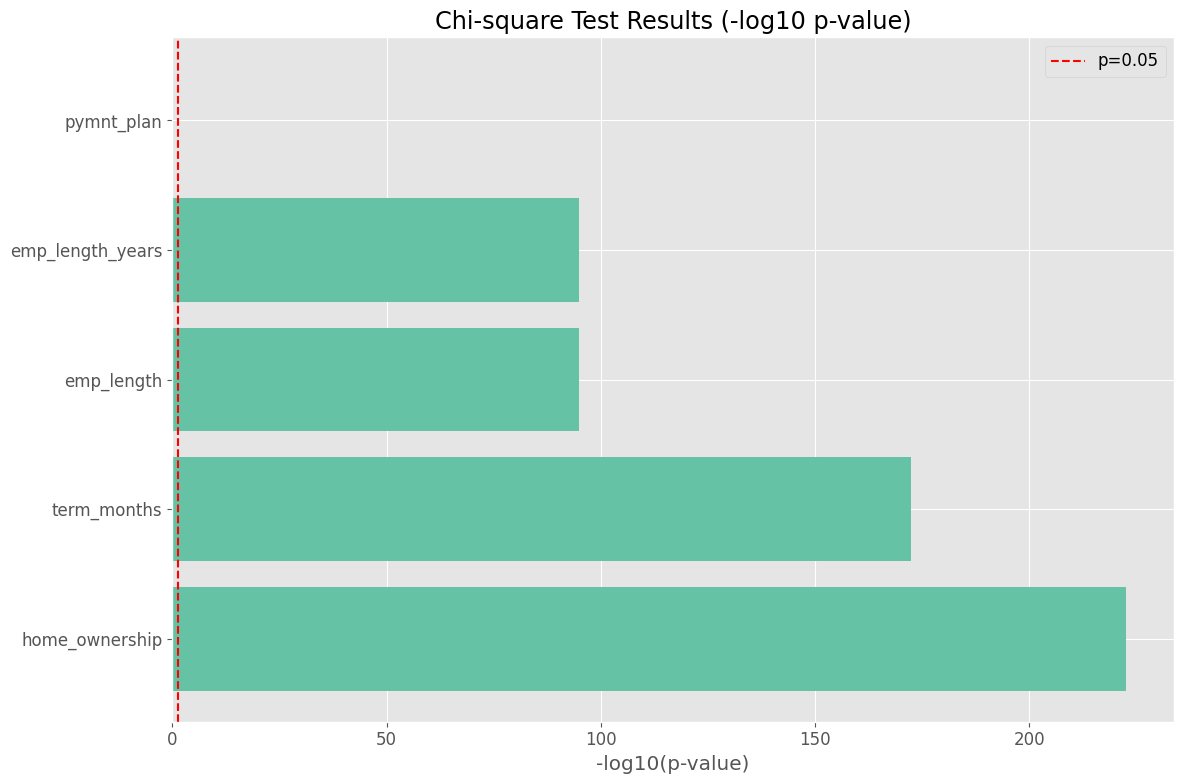

In [20]:
# Perform chi-square test on all categorical variables
chi_square_results = chi_square_test(df, target_col='is_default', excluded_cols=['is_default','loan_status'])

# Numerical T Test

In [ ]:
import matplotlib.ticker as mtick

# Set plotting style
plt.style.use('ggplot')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

def create_dataset_overview(df: pl.DataFrame):
    """Generate dataset overview statistics and visualizations"""
    
    # 1. Portfolio Summary Statistics
    print("Dataset Dimensions:", df.shape)
    
    # Time period analysis
    if "issue_d" in df.columns:
        min_date = df["issue_date"].min()
        max_date = df["issue_date"].max()
        print(f"Time Period: {min_date} to {max_date}")
    
    # 2. Loan Amount Distribution
    loan_stats = df.select([
        pl.col("loan_amnt").mean().alias("mean"),
        pl.col("loan_amnt").median().alias("median"),
        pl.col("loan_amnt").min().alias("min"),
        pl.col("loan_amnt").max().alias("max"),
        pl.col("loan_amnt").std().alias("std_dev")
    ])
    
    print("\nLoan Amount Statistics:")
    print(loan_stats)
    
    # 3. Loan Term Distribution
    term_counts = df.group_by("term_months").agg(
        pl.len().alias("count"),
        (pl.len() / len(df) * 100).alias("percentage")
    ).sort("count", descending=True)
    
    print("\nLoan Term Distribution:")
    print(term_counts)
    
    # 4. Interest Rate Statistics
    int_rate_stats = df.select([
        pl.col("int_rate").mean().alias("mean"),
        pl.col("int_rate").median().alias("median"),
        pl.col("int_rate").min().alias("min"),
        pl.col("int_rate").max().alias("max"),
        pl.col("int_rate").std().alias("std_dev")
    ])
    
    print("\nInterest Rate Statistics:")
    print(int_rate_stats)
    
    status_counts = df.group_by("loan_status").agg(
        pl.len().alias("count"),
        (pl.len() / len(df) * 100).alias("percentage")
    ).sort("count", descending=True)
    
    print("\nLoan Status Distribution:")
    print(status_counts)
    
    # 6. Employment Length Distribution (if available)
    if "emp_length" in df.columns:
        emp_counts = df.group_by("emp_length").agg(
            pl.len().alias("count"),
            (pl.len() / len(df) * 100).alias("percentage")
        ).sort("count", descending=True)
        
        print("\nEmployment Length Distribution:")
        print(emp_counts)
    
    # Visualizations for the slide
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Loan Amount Distribution
    sns.histplot(df["loan_amnt"], bins=30, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Loan Amount Distribution')
    axes[0, 0].set_xlabel('Loan Amount ($)')
    axes[0, 0].set_ylabel('Frequency')
    
    # Format x-axis with $ signs
    formatter = mtick.StrMethodFormatter('${x:,.0f}')
    axes[0, 0].xaxis.set_major_formatter(formatter)
    
    # 2. Interest Rate Distribution
    sns.histplot(df["int_rate"], bins=30, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Interest Rate Distribution')
    axes[0, 1].set_xlabel('Interest Rate (%)')
    axes[0, 1].set_ylabel('Frequency')
    
    # Format x-axis with % signs
    formatter = mtick.StrMethodFormatter('{x:.1f}%')
    axes[0, 1].xaxis.set_major_formatter(formatter)
    
    # 3. Status Group Distribution
    status_data = status_counts.sort("count")
    sns.barplot(
        x=status_data["count"].to_list(),
        y=status_data["loan_status"].to_list(),
        ax=axes[1, 0]
    )
    axes[1, 0].set_title('Loan Status Distribution')
    axes[1, 0].set_xlabel('Count')
    axes[1, 0].set_ylabel('Loan Status')
    
    # Add percentage labels
    for i, p in enumerate(axes[1, 0].patches):
        percentage = f"{status_data['percentage'][i]:.1f}%"
        axes[1, 0].annotate(percentage, 
                    (p.get_width(), p.get_y() + p.get_height()/2),
                    va = 'center', ha = 'left', xytext = (5, 0), 
                    textcoords = 'offset points')
    
    # 4. Term Distribution
    if term_counts.shape[0] > 0:
        term_data = term_counts.sort("count", descending=True)
        sns.barplot(
            x=term_data["term_months"].to_list(),
            y=term_data["percentage"].to_list(),
            ax=axes[1, 1]
        )
        axes[1, 1].set_title('Loan Term Distribution')
        axes[1, 1].set_xlabel('Term')
        axes[1, 1].set_ylabel('Percentage (%)')
        
        # Add percentage labels
        for i, p in enumerate(axes[1, 1].patches):
            percentage = f"{term_data['percentage'][i]:.1f}%"
            axes[1, 1].annotate(percentage, 
                        (p.get_x() + p.get_width()/2, p.get_height()), 
                        ha = 'center', va = 'bottom', xytext = (0, 5),
                        textcoords = 'offset points')
    
    plt.tight_layout()
    # plt.savefig('dataset_overview.png', dpi=300, bbox_inches='tight')
    # plt.close()
    
    # Create summary table for the slide
    summary_stats = {
        "Metric": ["Total Loans", "Time Period", "Avg Loan Amount", "Avg Interest Rate", "Most Common Term"],
        "Value": [
            f"{df.shape[0]:,}",
            f"{min_date.strftime('%b %Y')} - {max_date.strftime('%b %Y')}" if 'min_date' in locals() else "N/A",
            f"${loan_stats[0, 'mean']:,.2f}",
            f"{int_rate_stats[0, 'mean']:.2f}%",
            f"{term_counts[0, 'term_months']} ({term_counts[0, 'percentage']:.1f}%)" if term_counts.shape[0] > 0 else "N/A"
        ]
    }
    
    summary_df = pl.DataFrame(summary_stats)
    print("\nDataset Summary:")
    print(summary_df)
    
    # Return the dataframe with the status_group column added
    return df, summary_df